## ****Library Support****

In [72]:
import pandas as pd
import matplotlib.pyplot as plt      
import numpy as np             
import seaborn as sns             
import warnings 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
plt.style.use('fivethirtyeight')

## ****Import Data****

In [73]:
churn=pd.read_csv('bank_customer_churn_dataset.csv')

## ****Data Understanding****

**i) Informational Summary about the Dataset**

In [74]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**ii) Brief Descriptive Statistics about the Dataset**

In [75]:
churn.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


**iii) Total Number of Unique Values in each column of the Dataset**

In [76]:
churn.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

**iv) Total Number of Null Values in each column of the Dataset**

In [77]:
churn.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**v) Total Number of Duplicate Records in the Dataset**

In [78]:
churn.duplicated().sum()

0

**vi) Head of the DataFrame**

In [79]:
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**vii) Tail of the DataFrame**

In [80]:
churn.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## ****Data Preprocessing****

In [81]:
churn.iloc[:10]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [82]:
churn.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

***This dataset is already in a clean format, I'll just change the datatype of the feature `gender` to `category` <br/> since it only contains two unique entries***

In [83]:
churn['gender']=churn['gender'].astype('category')

## ****Exploratory Data Analysis****

#### ****i) Estimates of Location****

**1a) Mean**

In [84]:
churn[['credit_score','age','tenure','balance','estimated_salary']].mean()

credit_score           650.528800
age                     38.921800
tenure                   5.012800
balance              76485.889288
estimated_salary    100090.239881
dtype: float64

**1b) Trimmed Mean**

In [85]:
from scipy.stats import trim_mean
numericals=['credit_score','age','tenure','balance','estimated_salary']

In [86]:
for index in numericals:
    print(f"{str(index).replace('_',' ').capitalize()} : {trim_mean(churn[index].sort_values(ascending=False),0.1):,.2f}")

Credit score : 651.01
Age : 37.91
Tenure : 5.01
Balance : 74,827.80
Estimated salary : 100,114.86


**1c) Weighted Mean**

In [87]:
matches={
    'credit_score':'estimated_salary',
    'tenure':'credit_score',
    'age':'estimated_salary',
    'balance':'tenure',
    'estimated_salary':'age'
}

In [88]:
for key,value in matches.items():
    print(f"{str(key).replace('_',' ').capitalize()} on {str(value).replace('_',' ').capitalize()} : {np.average(churn[key],weights=churn[value]):,.2f}")

Credit score on Estimated salary : 650.45
Tenure on Credit score : 5.01
Age on Estimated salary : 38.88
Balance on Tenure : 76,044.78
Estimated salary on Age : 99,978.66


**1d) Median**

In [89]:
churn[['credit_score','age','tenure','balance','estimated_salary']].median()

credit_score           652.000
age                     37.000
tenure                   5.000
balance              97198.540
estimated_salary    100193.915
dtype: float64

**1e) Weighted Median**

In [90]:
import wquantiles as wq 

for key,value in matches.items():
    print(f"{str(key).replace('_',' ').capitalize()} on {str(value).replace('_',' ').capitalize()} : {wq.median(churn[key],weights=churn[value]):,.2f}")

Credit score on Estimated salary : 652.00
Tenure on Credit score : 5.00
Age on Estimated salary : 37.00
Balance on Tenure : 96,967.42
Estimated salary on Age : 99,799.11


**Neglecting the Trimmed Mean and Weighted Mean, and focusing on most widley used metric <font color='green'>Mean</font>, the Averages are as follows;**<br/>
Credit Score           650.528800<br/>
Age                  38.921800<br/>
Tenure                 5.012800<br/>
Balance             76485.889288<br/>
Estimated Salary   100090.239881

**Referencing Weighted Median, the Averages are as follows;**<br/>
Credit Score on Estimated salary : 652.00<br/>
Tenure on Credit score : 5.00<br/>
Age on Estimated salary : 37.00<br/>
Balance on Tenure : 96,967.42<br/>
Estimated Salary on Age : 99,799.11

***<font color='green'>The Averages between Mean and Median are different with the Mean exhibiting high values <br/> compared to Median due to the Mean being very susceptible to outliers.***

#### ****ii) Estimates of Variability / Dispersion****

**1a) Variance**

In [91]:
churn[['credit_score','age','tenure','balance','estimated_salary']].var()

credit_score        9.341860e+03
age                 1.099941e+02
tenure              8.364673e+00
balance             3.893436e+09
estimated_salary    3.307457e+09
dtype: float64

**1b) Standard Deviation**

In [92]:
churn[['credit_score','age','tenure','balance','estimated_salary']].std()

credit_score           96.653299
age                    10.487806
tenure                  2.892174
balance             62397.405202
estimated_salary    57510.492818
dtype: float64

**1c) Mean Absolute Deviation**

In [93]:
for index in numericals:
    print(f"{str(index).replace('_',' ').capitalize()} : {np.average(np.absolute(churn[index]-churn[index].mean())):,.2f}")

Credit score : 78.38
Age : 7.94
Tenure : 2.49
Balance : 56,660.71
Estimated salary : 49,676.50


**1d) Median Absolute Deviation**

In [94]:
for index in numericals:
    print(f"{str(index).replace('_',' ').capitalize()} : {np.average(np.absolute(churn[index]-churn[index].median())):,.2f}")

Credit score : 78.37
Age : 7.82
Tenure : 2.48
Balance : 54,547.29
Estimated salary : 49,676.43


**1e) Interquartile Range**

In [95]:
for index in numericals:
    iqr1,iqr2=np.percentile(churn[index],[75,25])
    print(f"{str(index).replace('_',' ').capitalize()} : {np.subtract(iqr1,iqr2):,.2f}")

Credit score : 134.00
Age : 12.00
Tenure : 4.00
Balance : 127,644.24
Estimated salary : 98,386.14


**Prioritizing Standard Deviation, the deviations are as follows:**<br/>
Credit Score          96.653299<br/>
Age                   10.487806<br/>
Tenure                 2.892174<br/>
Balance             62397.405202<br/>
Estimated Salary    57510.492818

***<font color='green'>Comparing the two robust metrics i.e Mean Absolute Deviation and Median Absolute Deviation to Variance and Standard Deviation, the<br/> Variance and Standard Deviation output high values due to susceptibility to outliers***

#### ****Exploring Data Distribution****

**1a) Boxplots and Percentiles**

*i) Boxplot*

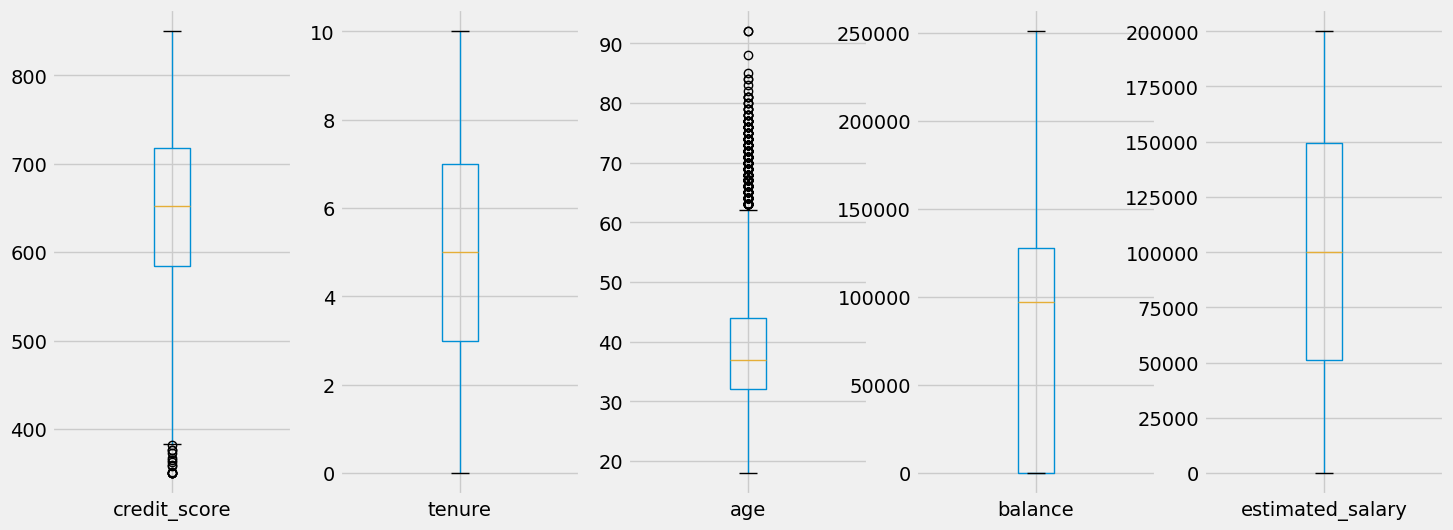

In [96]:
plt.figure(figsize=(16,6))
plt.subplot(1,5,1)
churn.boxplot(column=['credit_score'])
plt.subplot(1,5,2)
churn.boxplot(column=['tenure'])
plt.subplot(1,5,3)
churn.boxplot(column=['age'])
plt.subplot(1,5,4)
churn.boxplot(column=['balance'])
plt.subplot(1,5,5)
churn.boxplot(column=['estimated_salary'])
plt.show()

**<font color='green'>Credit Score and Age seem to have outliers.**

*ii) Percentiles*

In [97]:
churn[['credit_score','age','tenure','balance','estimated_salary']].quantile([0.05,0.1,0.2,0.25,0.5,0.75,1.0])

,credit_score,age,tenure,balance,estimated_salary
0.05,489.0,25.0,1.0,0.00,9851.8185
0.10,521.0,27.0,1.0,0.00,20273.5800
0.20,566.0,31.0,2.0,0.00,41050.7360
0.25,584.0,32.0,3.0,0.00,51002.1100
0.50,652.0,37.0,5.0,97198.54,100193.9150
0.75,718.0,44.0,7.0,127644.24,149388.2475
1.00,850.0,92.0,10.0,250898.09,199992.4800


**1b) Histogram and Density Plots**

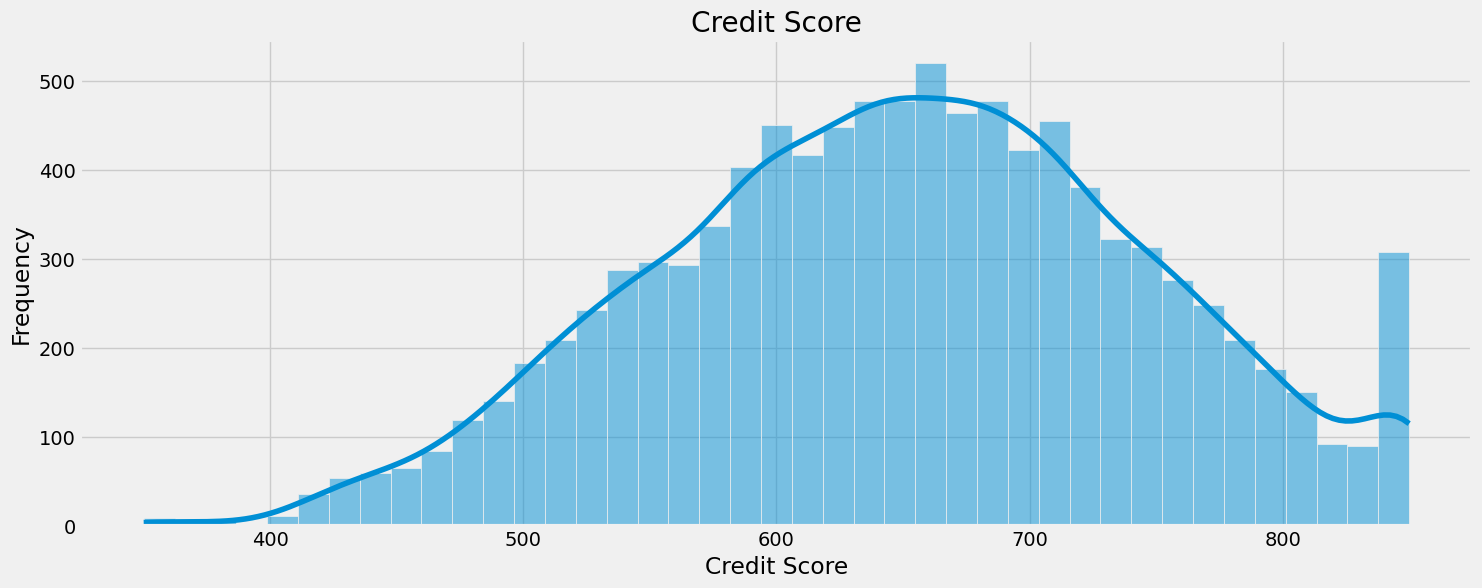

In [98]:
plt.figure(figsize=(16,6))
sns.histplot(x=churn['credit_score'],kde=True)
plt.title('Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

**<font color='green'>For the variable Credit Scores, the data is left skewed**

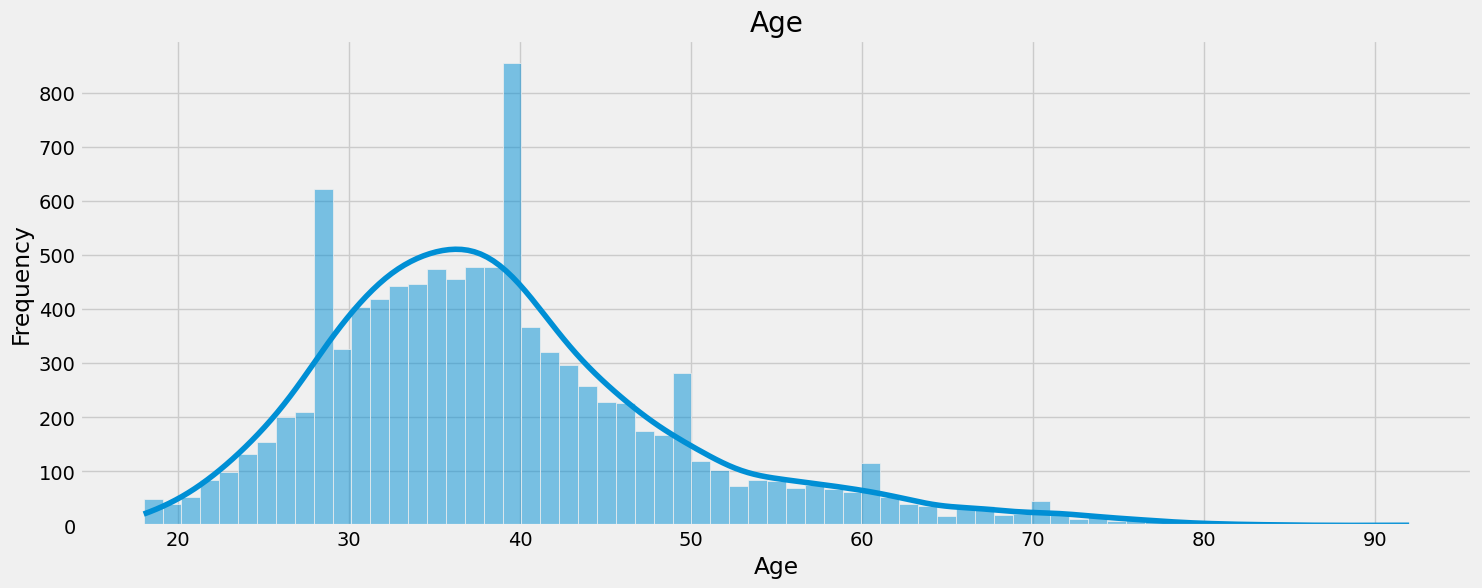

In [99]:
plt.figure(figsize=(16,6))
sns.histplot(x=churn['age'],kde=True)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**<font color='green'>For the variable Age, the data is right skewed**

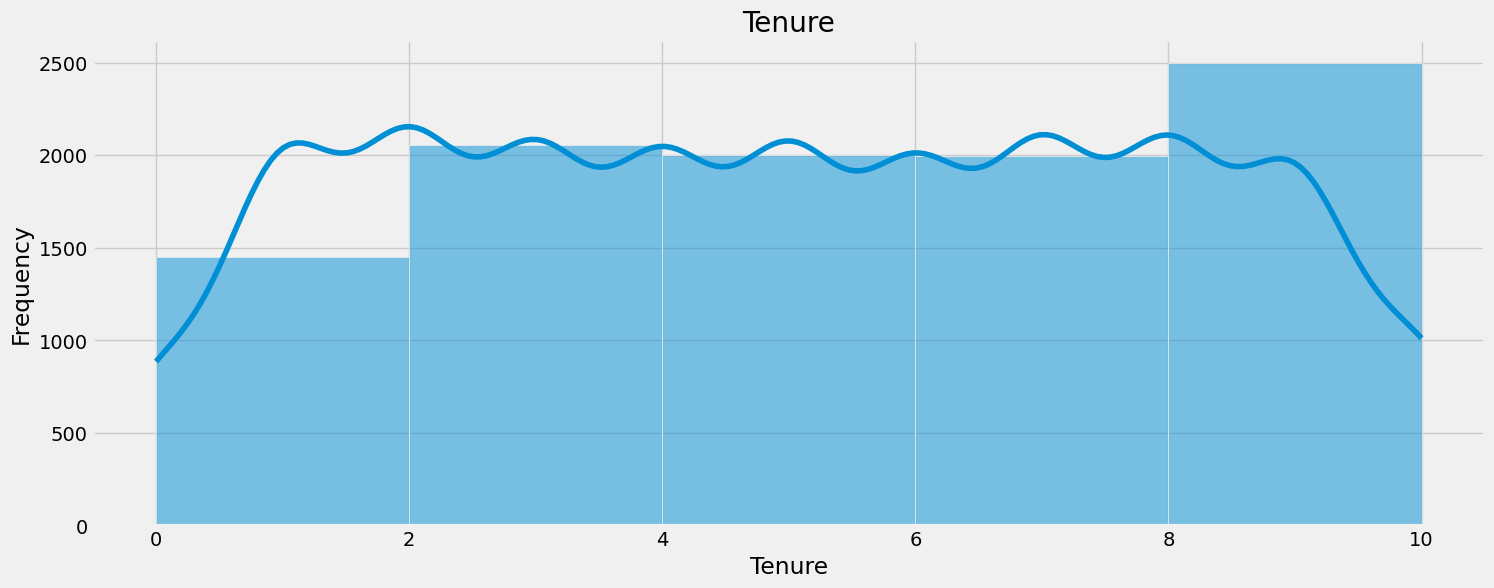

In [100]:
plt.figure(figsize=(16,6))
sns.histplot(x=churn['tenure'],kde=True,bins=5)
plt.title('Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

**<font color='green'>For the variable Tenure, the data seems to be right skewed**

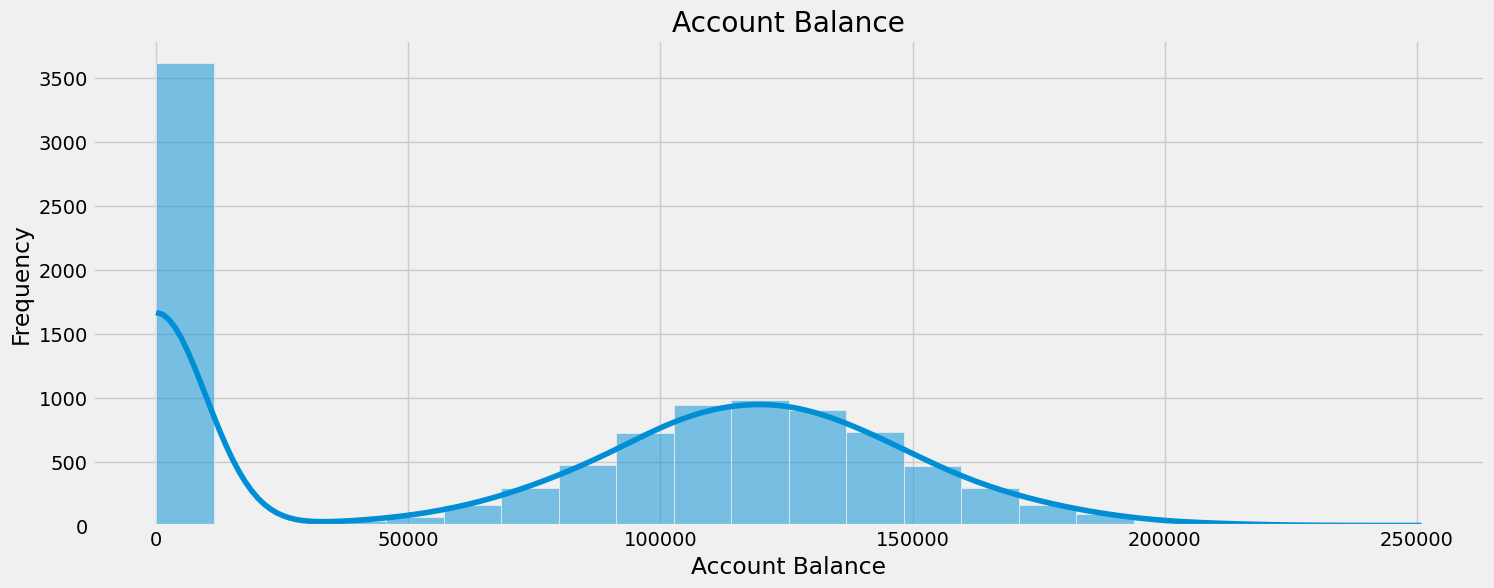

In [101]:
plt.figure(figsize=(16,6))
sns.histplot(x=churn['balance'],kde=True)
plt.title('Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

**<font color='green'>For the variable Account Balance, there is a high number of customers with zero balance and what seems like<br/> a normal distribution between 50000 and 200000**

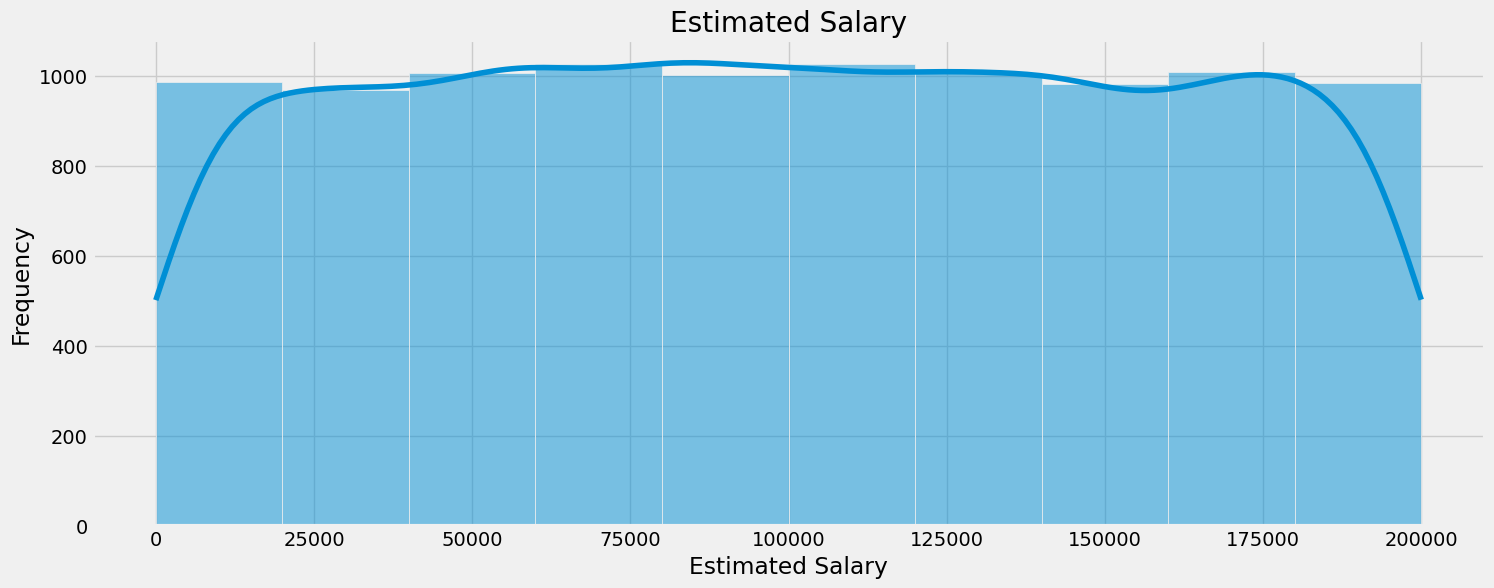

In [102]:
plt.figure(figsize=(16,6))
sns.histplot(x=churn['estimated_salary'],kde=True,bins=10)
plt.title('Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

**<font color='green'>For the variable Estimated Salary, there seems to be an almost equal proportionality between<br/> total count of customers and their respective salaries**

#### ****iv) Exploring Two or More Variables****

**1a) Barplots**

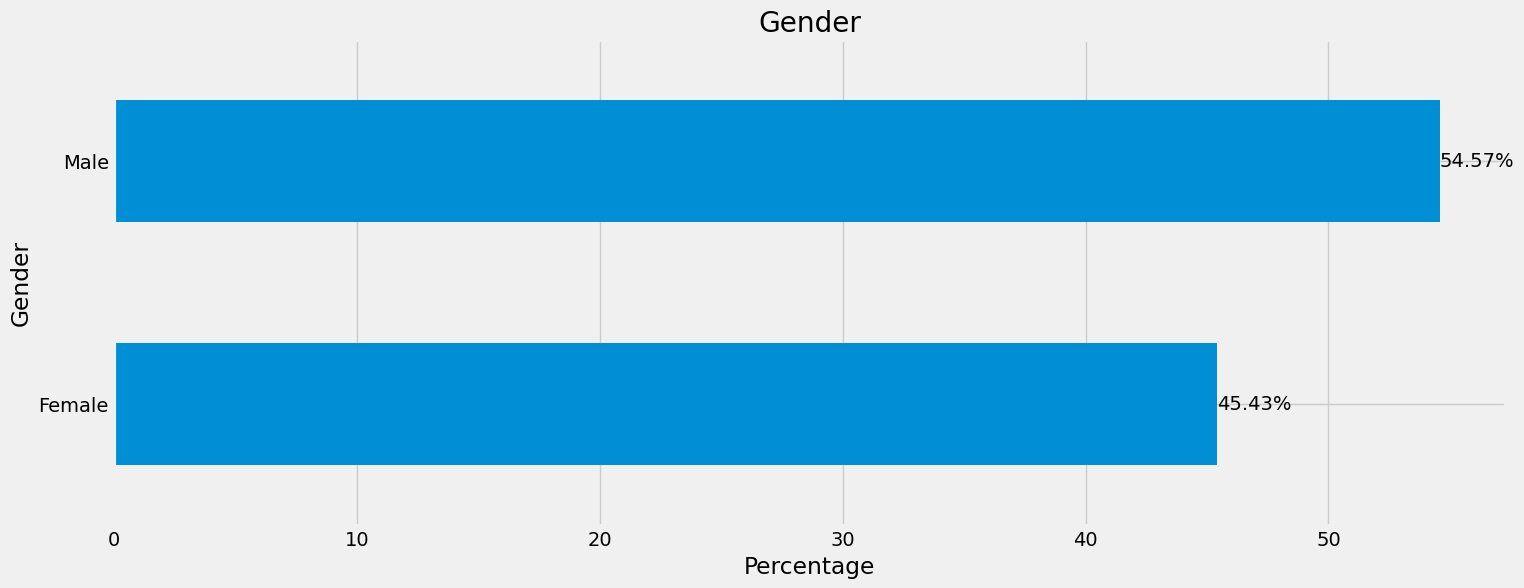

In [103]:
ax=(churn['gender'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),
                                                    title='Gender',xlabel='Percentage',ylabel='Gender')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

**<font color='green'>Over 50% of customers are Males.**

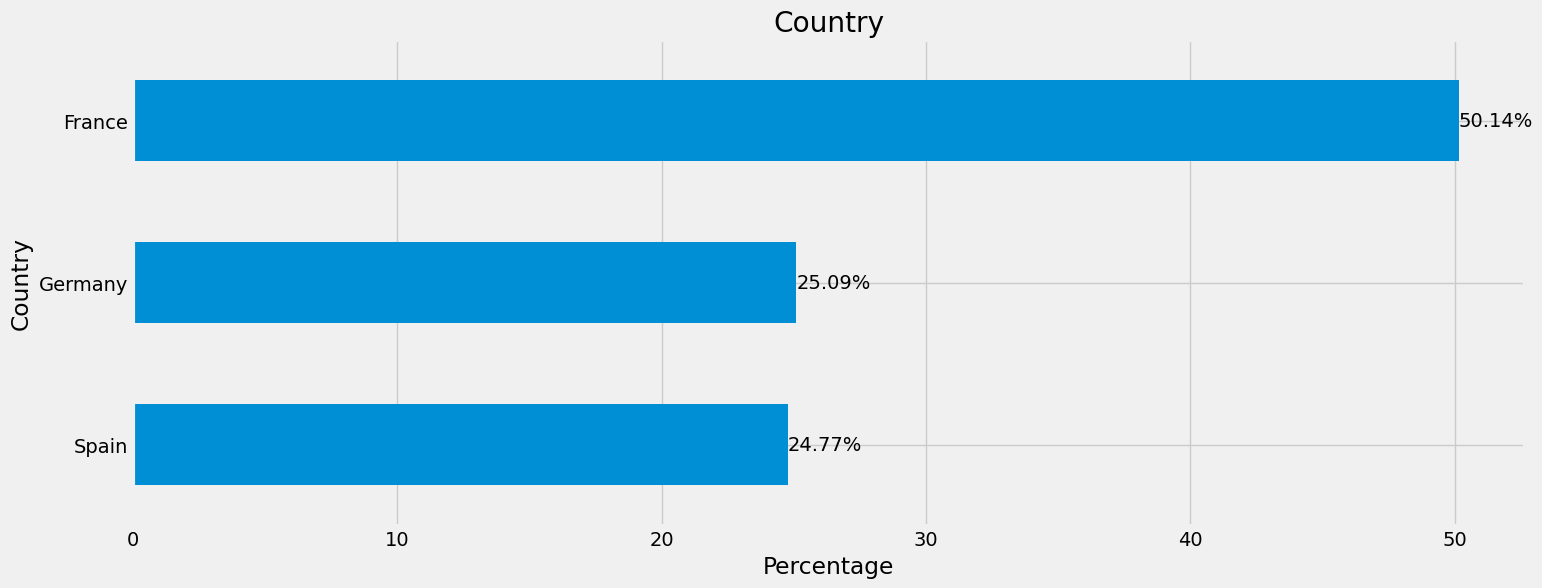

In [104]:
ax=(churn['country'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),
                                                    title='Country',xlabel='Percentage',ylabel='Country')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

**<font color='green'>50% of customers are citizens of France.**

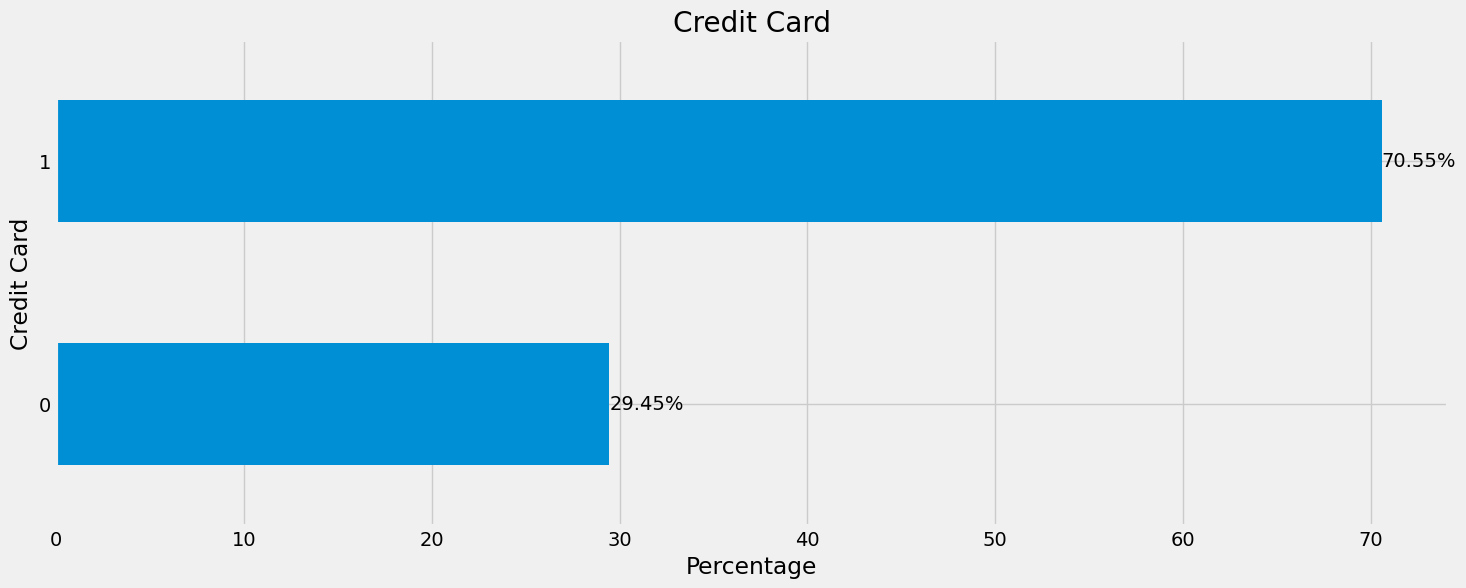

In [105]:
ax=(churn['credit_card'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),
                                                    title='Credit Card',xlabel='Percentage',ylabel='Credit Card')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

**<font color='green'>70% of customers posses credit cards.**

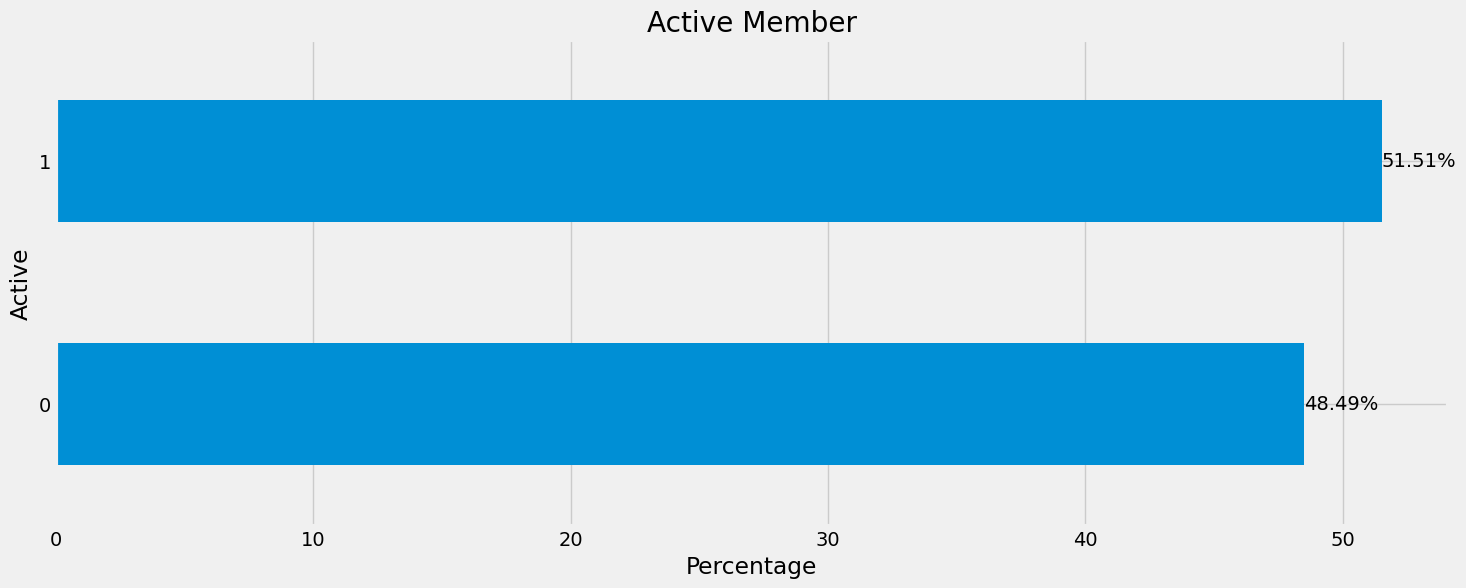

In [106]:
ax=(churn['active_member'].value_counts(normalize=True)*100).sort_values().plot(kind='barh',figsize=(16,6),
                                                    title='Active Member',xlabel='Percentage',ylabel='Active')
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
plt.show()

**<font color='green'>48% of customers are inactive members.**

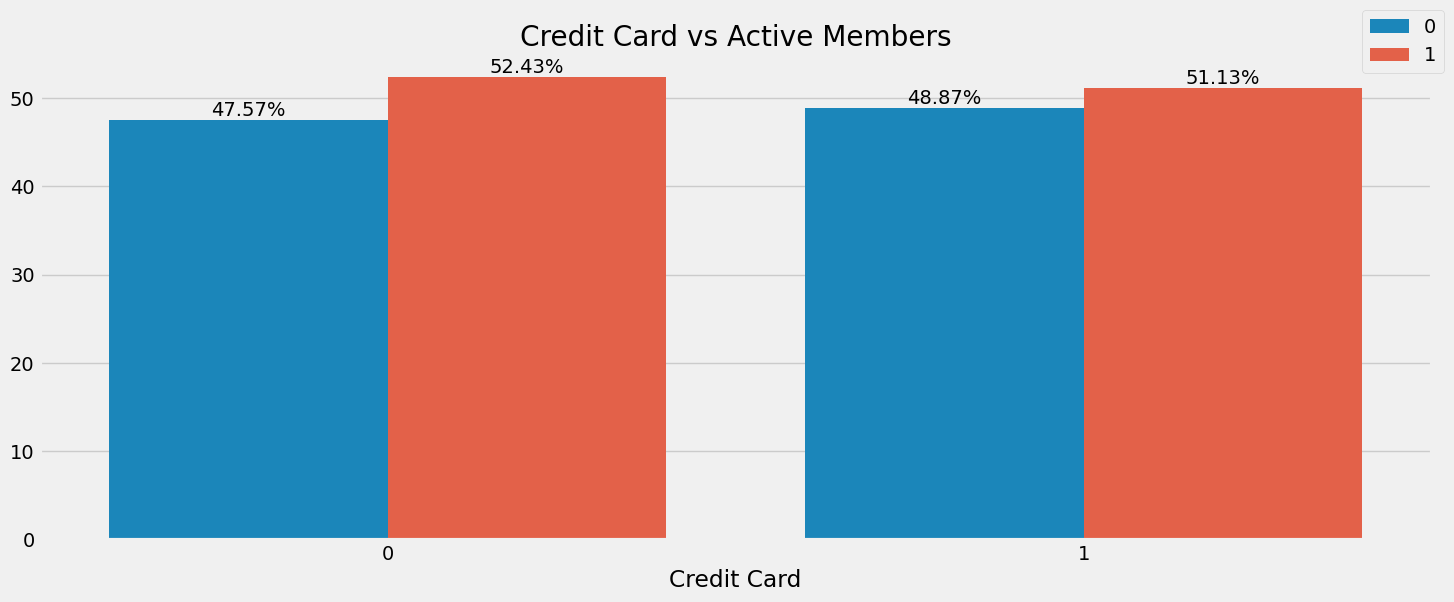

In [107]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(churn.groupby('credit_card')['active_member'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(churn.groupby('credit_card')['active_member'].value_counts(normalize=True)*100).values,
    hue=(churn.groupby('credit_card')['active_member'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Credit Card vs Active Members')
plt.xlabel('Credit Card')
plt.legend(loc=[0.95,0.96])
plt.show()

**<font color='green'>For non credit card customers, 52% are active members while for credit card customers, 51% are active members.**

**1b) Correlation**

*i) Correlation Matrix*

In [108]:
churn[['credit_score','age','tenure','balance','estimated_salary','active_member','credit_card']].corr()

,credit_score,age,tenure,balance,estimated_salary,active_member,credit_card
credit_score,1.000000,-0.003965,0.000842,0.006268,-0.001384,0.025651,-0.005458
age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.085472,-0.011721
tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.028362,0.022583
balance,0.006268,0.028308,-0.012254,1.000000,0.012797,-0.010084,-0.014858
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,1.000000,-0.011421,-0.009933
active_member,0.025651,0.085472,-0.028362,-0.010084,-0.011421,1.000000,-0.011866
credit_card,-0.005458,-0.011721,0.022583,-0.014858,-0.009933,-0.011866,1.000000


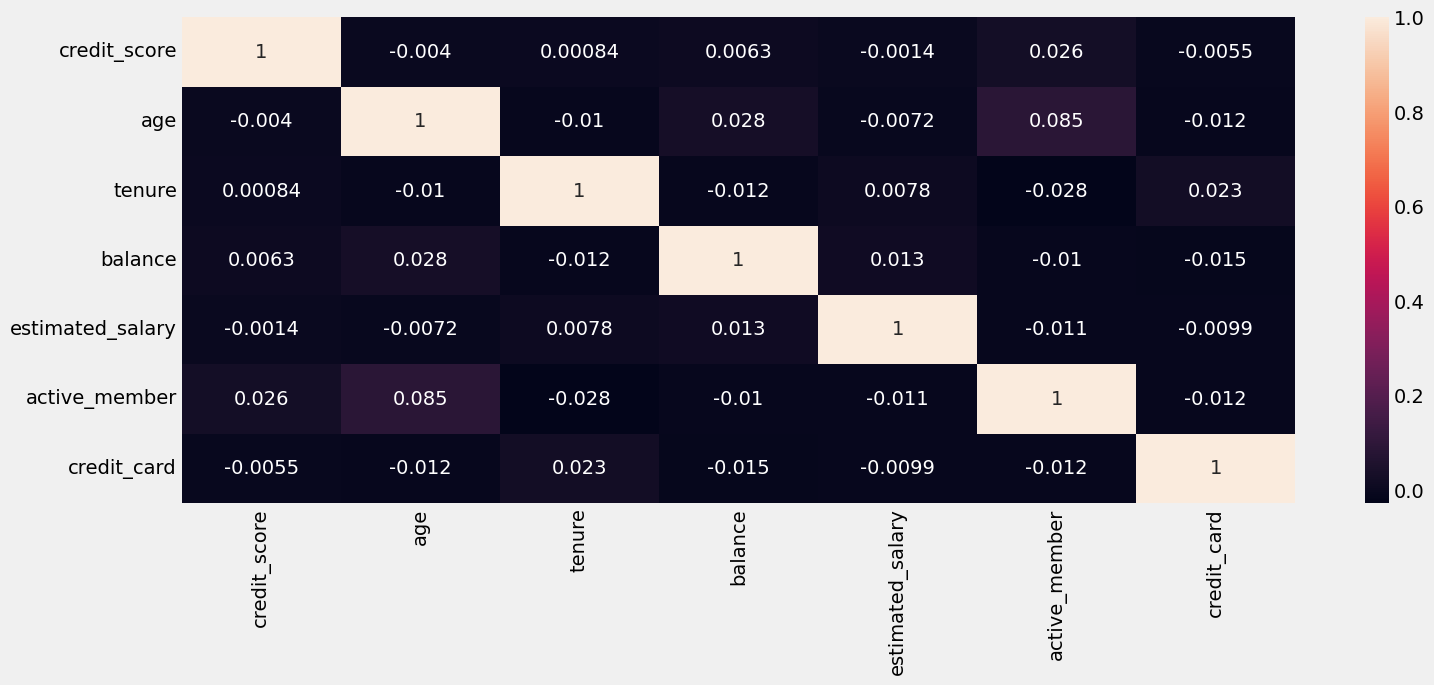

In [109]:
plt.figure(figsize=(16,6))
sns.heatmap(churn[['credit_score','age','tenure','balance','estimated_salary','active_member','credit_card']].corr(),annot=True)
plt.show()

**<font color='green'>The heatmap shows evidence of a low correlation between the numeric variables.**

*ii) Correlation Coefficient*

In [110]:
from scipy.stats import pearsonr
for key,value in matches.items():
    corr,p_value=pearsonr(churn[key],churn[value])
    print(f"{key} & {value}\nCorrelation Coefficient : {corr}\nP-Value : {p_value}\n")

credit_score & estimated_salary
Correlation Coefficient : -0.001384292867984518
P-Value : 0.8899147753803484

tenure & credit_score
Correlation Coefficient : 0.0008419418186459884
P-Value : 0.9329104000333244

age & estimated_salary
Correlation Coefficient : -0.007201042376657323
P-Value : 0.4715104934944178

balance & tenure
Correlation Coefficient : -0.012253926175215535
P-Value : 0.2204676946190379

estimated_salary & age
Correlation Coefficient : -0.007201042376657323
P-Value : 0.4715104934944178



**<font color='green'>Since P-value is greater than 0.1 for all the variables, we have no certainty in the Correlation Coefficient.**

#### ****v) Exploring Binary and Categorical Data****

**1a) Contigency Table**

In [111]:
contigency_table=pd.pivot_table(data=churn,index='age',columns=['country','gender'],values='estimated_salary',fill_value='No Estimate')

In [112]:
contigency_table

country         France                       Germany                 \
gender          Female           Male         Female           Male   
age                                                                   
18            40704.15   89441.423333      161747.12     75040.7925   
19            89740.84    70878.64125      90044.645      114270.82   
20           73346.185  119666.067692       58543.71     119677.845   
21          95963.6275   99641.195455    116827.5425       80306.85   
22        99282.729091  101914.823478      69307.882   82377.916667   
23       130885.325625  106093.676552   95539.149167  109961.211333   
24       107353.263889  114649.472703  116659.267778  111065.645556   
25           97388.329      101841.52  114079.684615    95610.74619   
26       100105.684314  103205.146129  116811.120526    82028.28875   
27        97323.972615  108869.572745   88184.265294  111455.382963   
28        95906.041964    99727.51557   81472.777241    96124.14725   
29       106421.817303   102189.96028   89168.373947  107332.036286   
30       118323.581562  101144.426019  106442.994865   84981.846591   
31        89179.231782   95793.772564  111113.585526  102396.519796   
32       107469.709592   96911.581789  101140.236341   96974.486271   
33       110511.651942   91418.879545  102465.682222   90366.584828   
34           97746.255  103958.475517     129533.478   91731.264565   
35        89765.191441   89448.410336  118697.471915   108043.38303   
36        97450.232584    99829.17993   80406.606889  111627.766275   
37        90632.861319  102016.935882  107039.921818  108297.994839   
38        94833.430696  100826.024403      93159.095   96334.647963   
39        93764.711165   99820.408283   97919.766809    98934.01434   
40       107739.714667  112166.638906  114944.541273   98583.532549   
41       105703.530241  101211.952159  111679.052143  108298.606167   
42        94757.960845    98435.41012   95137.033333   83993.966939   
43       100954.723607   93580.189079    91788.77375  104472.225556   
44       105718.612115   94468.052535   92949.548611  104995.247429   
45       114819.680816   97292.444314   97849.323056  108447.395676   
46            97482.31  104317.735769   112202.33875   86103.068462   
47        98766.731538    107294.8325  106690.398333     116711.428   
48       101181.509143     119259.725  105226.480606     94735.2676   
49       112439.610833  100043.610606    118822.6556  119741.477917   
50             95960.8  101438.682353   88220.402353   88026.931852   
51        99437.645185  113723.761333   81615.461364  109235.736667   
52        91173.571905  103461.020714   79037.632667   109413.54875   
53        94033.687273  113797.126667       86213.53  108337.395455   
54          105824.184   94634.682692  131026.059333   91411.237692   
55        78053.314444   80594.404286   100103.77125   106211.77125   
56        90561.653333   98112.352727   90527.941818   87263.447143   
57       110093.739333   81111.809286   90303.066923  103064.305556   
58        74290.549167   107619.87875   92720.124545   91540.648462   
59          122724.104    90409.24125  123487.637273   89705.672857   
60        77471.494762  101559.323182      75568.646     115783.172   
61           94367.466     101945.012  118794.107778      90160.415   
62       112330.195833   82805.339167    73622.98125       93095.72   
63        74943.453333  109962.157273       69643.31      91850.074   
64        65835.016667     82515.5175  108157.602857        95421.0   
65          95785.5325       77240.26      155799.86      83706.716   
66          103466.773   92802.987778     163770.225  112055.036667   
67           65942.115   90715.502222    No Estimate       96963.45   
68       149869.046667  110856.198333      117186.96     124274.474   
69           97042.885   119976.14125     114969.605   75053.393333   
70        87501.356667       90891.51      83689.905      55089.525   
71       104021.244286  

**1b) Boxplot**

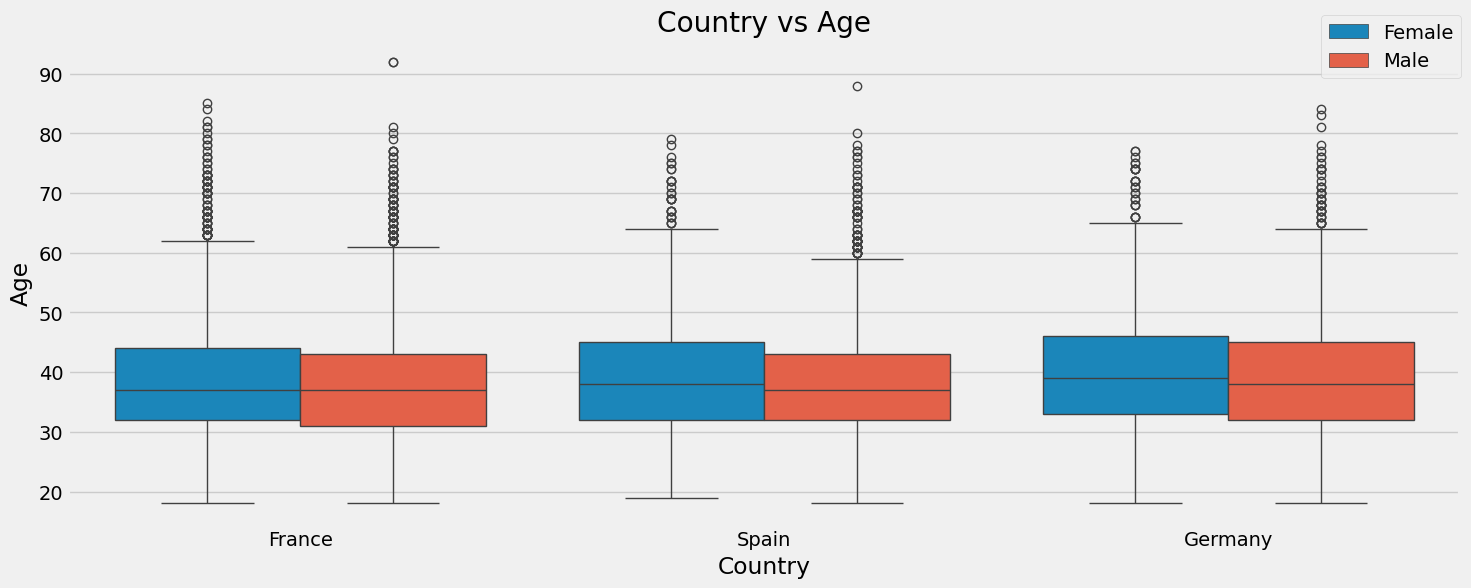

In [113]:
plt.figure(figsize=(16,6))
sns.boxplot(x=churn['country'],y=churn['age'],hue=churn['gender'])
plt.title('Country vs Age')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(loc=[0.9,0.92])
plt.show()

**<font color='green'>For all the countries, both males and females have some high age outliers.**

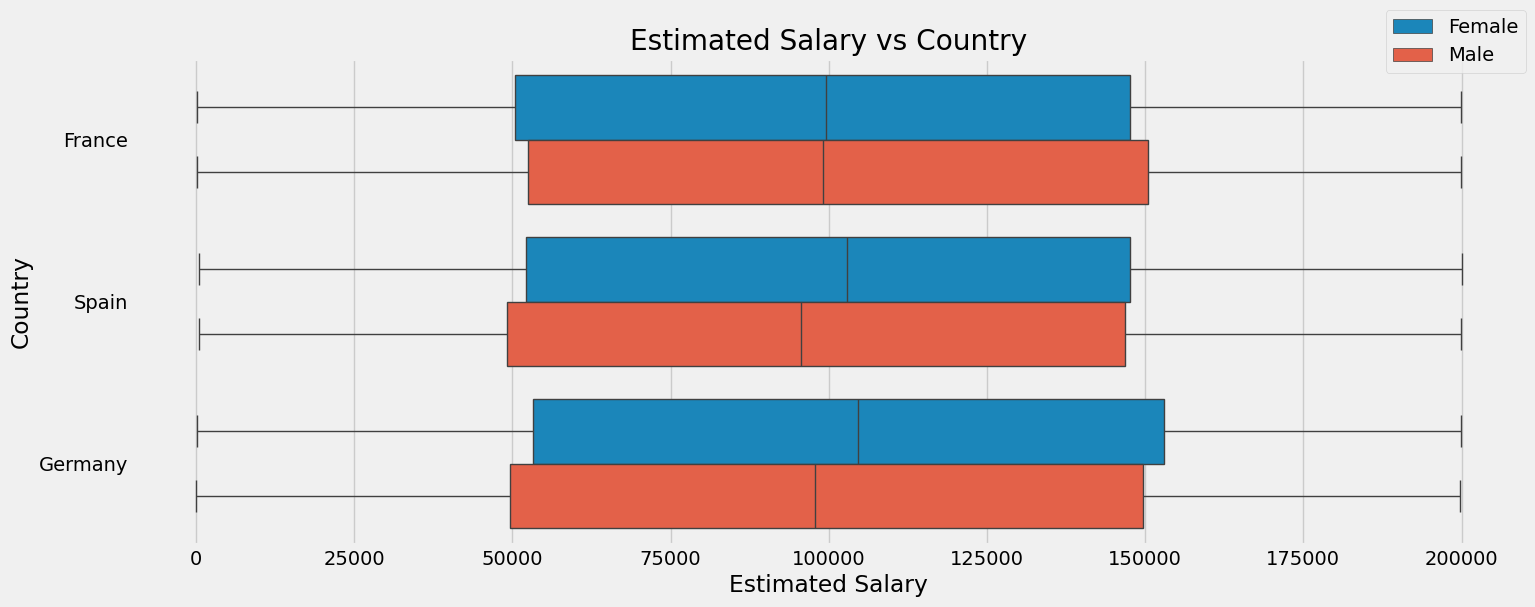

In [114]:
plt.figure(figsize=(16,6))
sns.boxplot(x=churn['estimated_salary'],y=churn['country'],hue=churn['gender'])
plt.title('Estimated Salary vs Country')
plt.xlabel('Estimated Salary')
plt.ylabel('Country')
plt.legend(loc=[0.9,0.97])
plt.show()

#### ****Outlier Detection and Removal using Interquartlie Range****

**i) Find the Upper and Lower Limit for Outlier Detection**

*i) Age*

In [115]:
iqr1,iqr2=np.percentile(churn['age'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [116]:
upper_limit = iqr1 + 1.5*IQR
lower_limit=iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit}\nLower Limit : {lower_limit}")

Upper Limit : 62.0
Lower Limit : 14.0


In [117]:
churn=churn.loc[(churn['age'] <= upper_limit) & (churn['age'] >= lower_limit)]

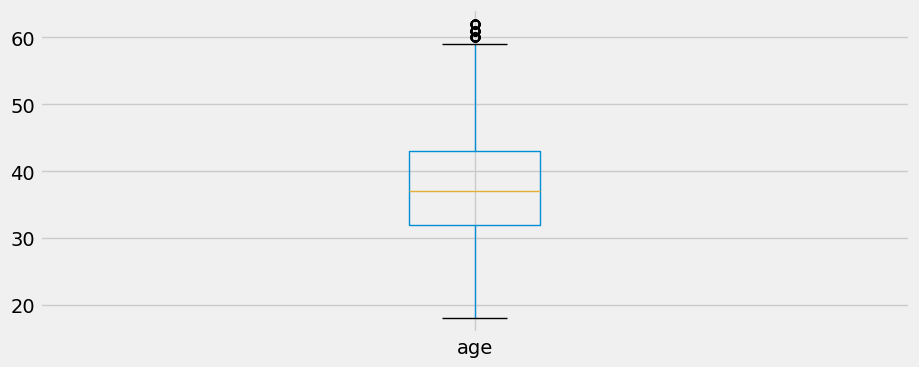

In [123]:
churn.boxplot(column=['age'],figsize=(16,6))
plt.show()

*ii) Credit Score*

In [118]:
iqr1,iqr2=np.percentile(churn['credit_score'],[75,25])
IQR=np.subtract(iqr1,iqr2)

In [119]:
upper_limit = iqr1 + 1.5*IQR
lower_limit=iqr2 - 1.5*IQR
print(f"Upper Limit : {upper_limit}\nLower Limit : {lower_limit}")

Upper Limit : 918.0
Lower Limit : 382.0


In [120]:
churn=churn.loc[(churn['credit_score'] <= upper_limit) & (churn['credit_score'] >= lower_limit)]

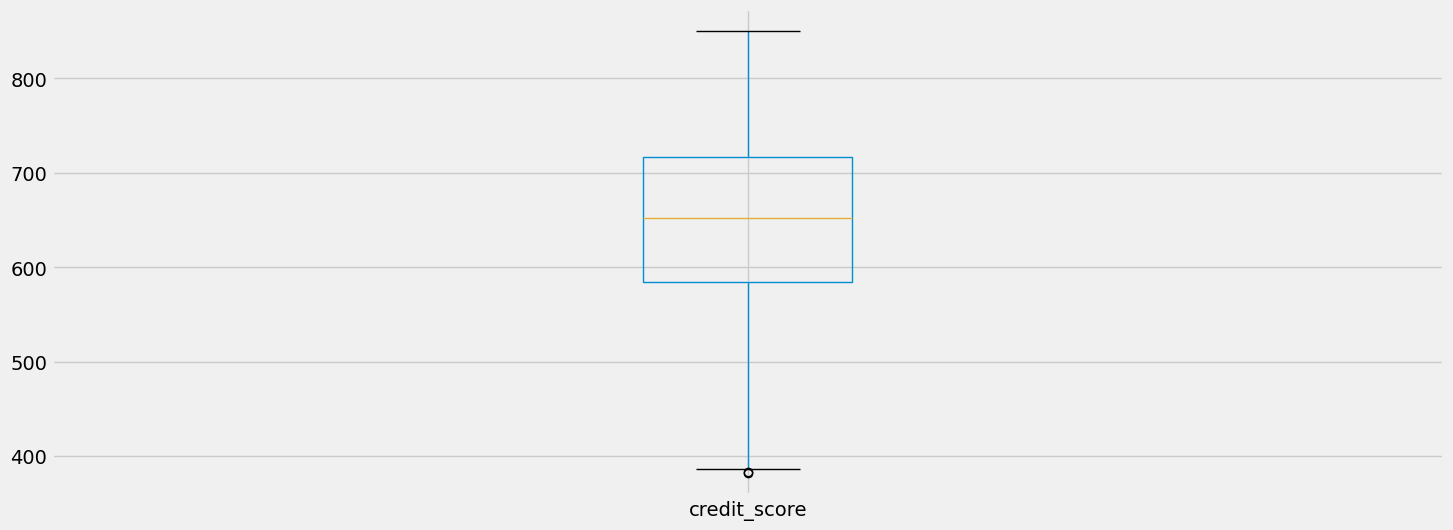

In [121]:
churn.boxplot(column=['credit_score'],figsize=(16,6))
plt.show()

#### ****Model Development****

In [124]:
churn.iloc[:5]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
churn['credit_score'].max(),churn['credit_score'].min()

(850, 382)